In [1]:
from functools import partial
import numpy as np
import os
import pandas as pd
import scipy

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib as mpl
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 1
%aimport util

save_fig = partial(util.save_fig, save=True)

In [2]:
dataset_raw = pd.read_csv(util.DATASET_SUBSET).set_index(['Country', 'Year'])
dataset = dataset_raw.copy()
dataset_raw_all = pd.read_csv(util.DATASET_ALL).set_index(['Country', 'Year'])
dataset_all = dataset_raw_all.copy()

In [3]:
def distplot(x, align='right', **kwargs):
    plt.figure(figsize=(4, 4))
    sns.histplot(x, kde=True, stat='probability', bins=20, **kwargs)
    pval = scipy.stats.normaltest(x, nan_policy='omit').pvalue
    x, ha = (0.95, 'right') if align == 'right' else (0.05, 'left')
    ptext = 'p-value = {:.2f}'.format(pval) if pval >= 0.01 else 'p-value < 0.01'
    plt.annotate(ptext, xy=(x, 0.95),
                 xycoords='axes fraction', ha=ha, va='top')
    plt.ylim(0, plt.ylim()[1] * 1.05)
    plt.tight_layout()

# ENI

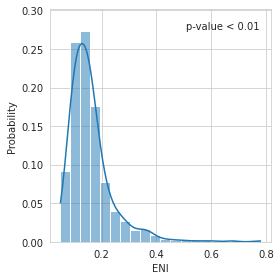

In [4]:
distplot(dataset_raw['ENI'])
save_fig('distplot_ENI.pdf')

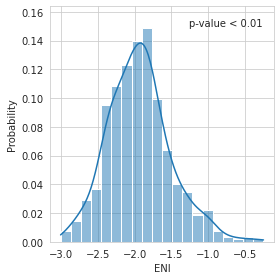

In [5]:
dataset['ENI'] = np.log(dataset_raw['ENI'])
dataset_all['ENI'] = np.log(dataset_raw_all['ENI'])

distplot(dataset['ENI'])
save_fig('distplot_lnENI.pdf')

# POP

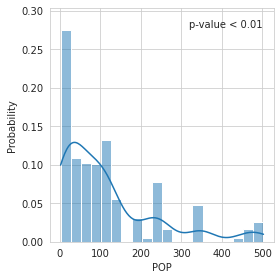

In [6]:
distplot(dataset_raw['POP'])
save_fig('distplot_POP.pdf')

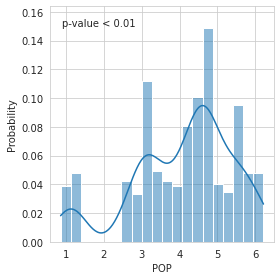

In [7]:
dataset['POP'] = np.log(dataset_raw['POP'])
dataset_all['POP'] = np.log(dataset_raw_all['POP'])

distplot(dataset['POP'], align='left')
save_fig('distplot_lnPOP.pdf')

# AFL

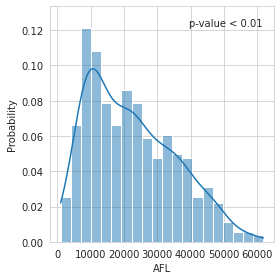

In [8]:
distplot(dataset_raw['AFL'])
save_fig('distplot_AFL.pdf')

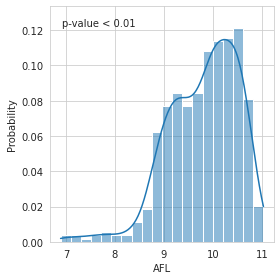

In [9]:
dataset['AFL'] = np.log(dataset_raw['AFL'])
dataset_all['AFL'] = np.log(dataset_raw_all['AFL'])

distplot(dataset['AFL'], align='left')
save_fig('distplot_lnAFL.pdf')

count    90.000000
mean      9.622939
std       0.906267
min       6.865954
25%       9.119419
50%       9.751662
75%      10.365059
max      11.229160
Name: 2010, dtype: float64

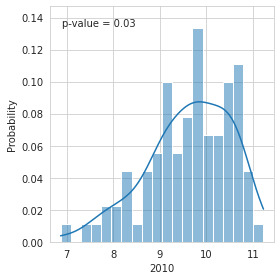

In [10]:
afl2010 = dataset_all.reset_index().pivot('Year', 'Country', 'AFL').ffill().loc[2010]
distplot(afl2010, align='left')
afl2010.describe()

In [11]:
high_income = afl2010 > afl2010.median()
high_income
# dataset_all['AFL'].groupby(high_income).describe()

Country
ALB    False
ARG     True
ARM    False
AUS     True
AUT     True
       ...  
UZB    False
VEN    False
VNM    False
ZAF    False
ZMB    False
Name: 2010, Length: 90, dtype: bool

# URB

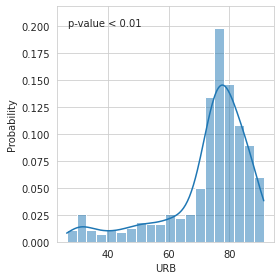

In [12]:
distplot(dataset_raw['URB'], align='left')
save_fig('distplot_URB.pdf')

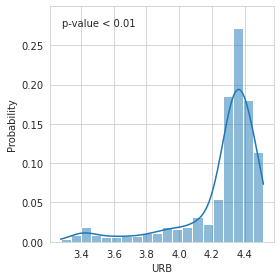

In [13]:
dataset['URB'] = np.log(dataset_raw['URB'])
dataset_all['URB'] = np.log(dataset_raw_all['URB'])

distplot(dataset['URB'], align='left')
save_fig('distplot_lnURB.pdf')

# TI

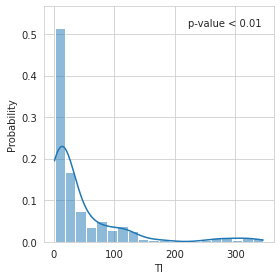

In [14]:
distplot(dataset_raw['TI'], align='right')
save_fig('distplot_TI.pdf')

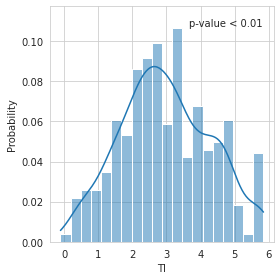

In [15]:
dataset['TI'] = np.log(dataset_raw['TI'])
dataset_all['TI'] = np.log(dataset_raw_all['TI'])

distplot(dataset['TI'], align='right')
save_fig('distplot_lnTI.pdf')

# TS

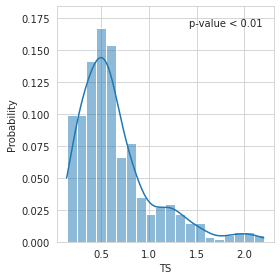

In [16]:
distplot(dataset_raw['TS'], align='right')
save_fig('distplot_TS.pdf')

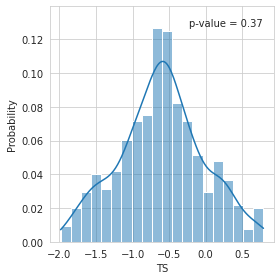

In [17]:
dataset['TS'] = np.log(dataset_raw['TS'])
dataset_all['TS'] = np.log(dataset_raw_all['TS'])

distplot(dataset['TS'], align='right')
save_fig('distplot_lnTS.pdf')

# CTS

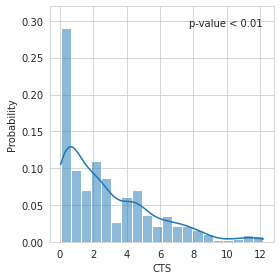

In [18]:
distplot(dataset_raw['CTS'], align='right')
save_fig('distplot_CTS.pdf')

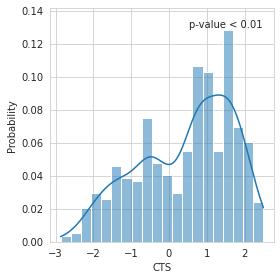

In [19]:
dataset['CTS'] = np.log(dataset_raw['CTS'])
dataset_all['CTS'] = np.log(dataset_raw_all['CTS'])

distplot(dataset['CTS'], align='right')
save_fig('distplot_lnCTS.pdf')

# KAOPEN

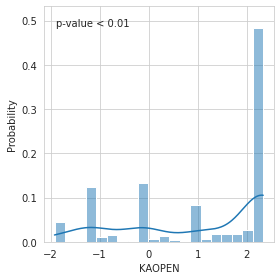

In [20]:
dataset['KAOPEN'] = dataset_raw['KAOPEN']
dataset_all['KAOPEN'] = dataset_raw_all['KAOPEN']

distplot(dataset_raw['KAOPEN'], align='left')
save_fig('distplot_KAOPEN.pdf')

In [21]:
dataset.to_csv(util.DATASET_SUBSET_FINAL)
dataset_all.to_csv(util.DATASET_ALL_FINAL)

In [22]:
idxs = dataset.index.intersection(dataset_all.index)
pd.testing.assert_frame_equal(dataset.loc[idxs], dataset_all.loc[idxs])

<AxesSubplot:>

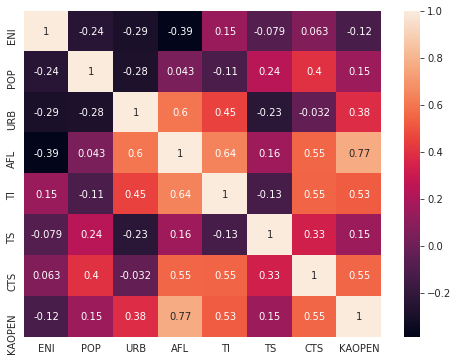

In [23]:
sns.heatmap(dataset.corr(), annot=True)

<AxesSubplot:xlabel='CTS', ylabel='ENI'>

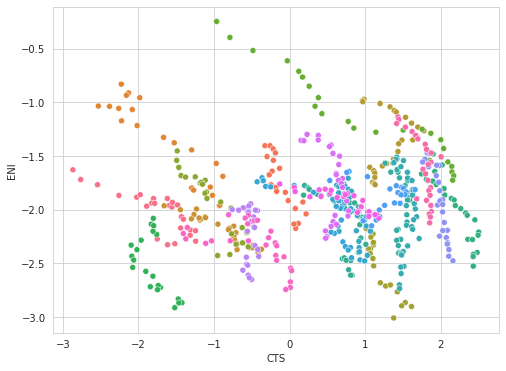

In [44]:
sns.scatterplot(x='CTS', y='ENI', hue='Country', 
                data=dataset.reset_index(),
               legend=False)

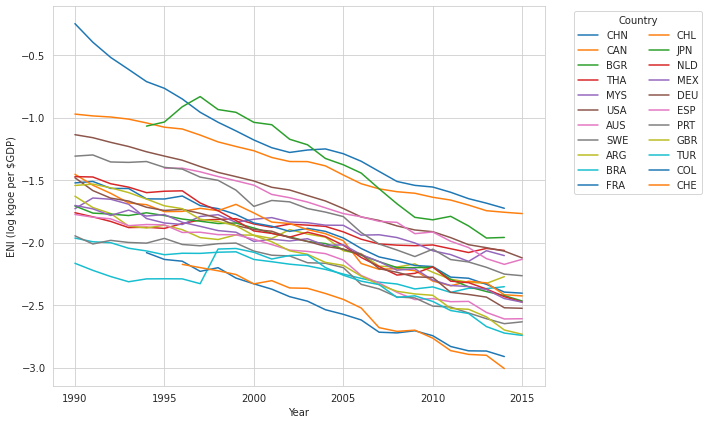

In [24]:
ENI = dataset.reset_index().pivot('Year', 'Country', 'ENI')
order = ENI.ffill().iloc[-1].sort_values(ascending=False).index
fig, ax = plt.subplots(figsize=(10,6))
ENI[order].plot(legend=False, ax=ax)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.ylabel('ENI (log kgoe per $GDP)')
plt.tight_layout()
save_fig('timeseries_ENI_subset.pdf')

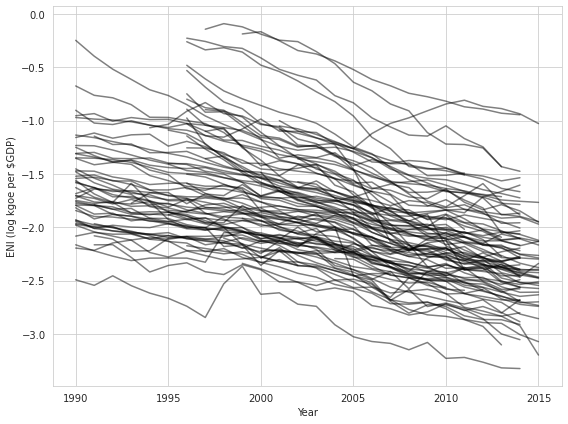

In [25]:
ENI = dataset_all.reset_index().pivot('Year', 'Country', 'ENI')
order = ENI.ffill().iloc[-1].sort_values(ascending=False).index
ENI[order].plot(legend=False, color='black', alpha=0.5)
plt.ylabel('ENI (log kgoe per $GDP)')
plt.tight_layout()
save_fig('timeseries_ENI_all.pdf')

In [26]:
dataset_raw.groupby(level='Country')['ENI'].count().sort_values()

Country
CHE    19
AUS    21
BGR    21
COL    21
ARG    25
BRA    25
THA    25
CHN    25
MYS    25
SWE    26
PRT    26
NLD    26
MEX    26
ESP    26
GBR    26
FRA    26
TUR    26
DEU    26
CHL    26
CAN    26
JPN    26
USA    26
Name: ENI, dtype: int64

In [27]:
len(dataset_raw.index.levels[1])

26

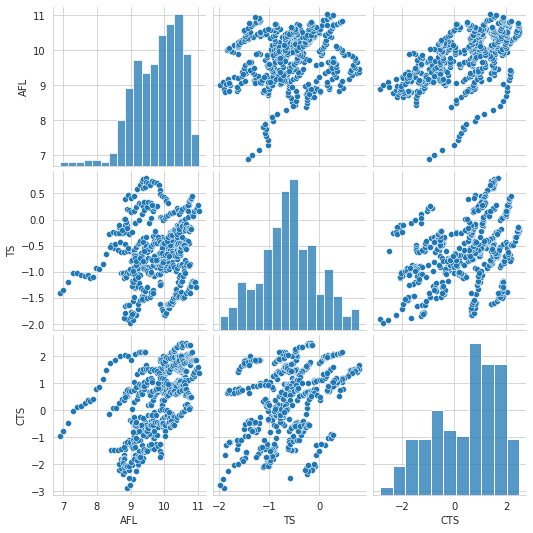

In [28]:
sns.pairplot(dataset[['AFL', 'TS', 'CTS']])